### Big HW
Decision Tree
Random Forest
LogReg
KNN
Naive Bayes 

In [66]:
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [81]:
import matplotlib.pyplot as plt

In [70]:
import fcalc

In [85]:
df_h = pd.read_csv('Datasets/heart.csv')
# df_l = pd.read_csv('Datasets/Anonymize_Loan_Default_data.csv', encoding='unicode_escape')
# df_b = pd.read_csv(r'Datasets\hotel_booking.csv', encoding='unicode_escape')
display(df_h)
# display(df_l)
# display(df_b)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: >

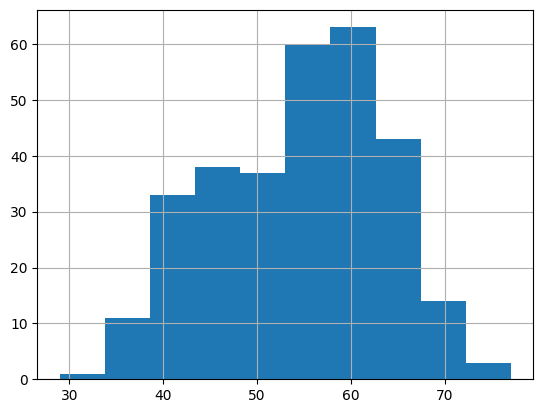

In [86]:
df_h['age'].hist()

In [87]:
df_b = pd.DataFrame()

In [89]:
df_b['age'] = pd.qcut(df_h['age'], q=10)
df_b

,age
0,"(62.0, 66.0]"
1,"(28.999, 42.0]"
2,"(28.999, 42.0]"
3,"(55.0, 58.0]"
4,"(55.0, 58.0]"
...,...
298,"(55.0, 58.0]"
299,"(42.0, 45.0]"
300,"(66.0, 77.0]"
301,"(55.0, 58.0]"


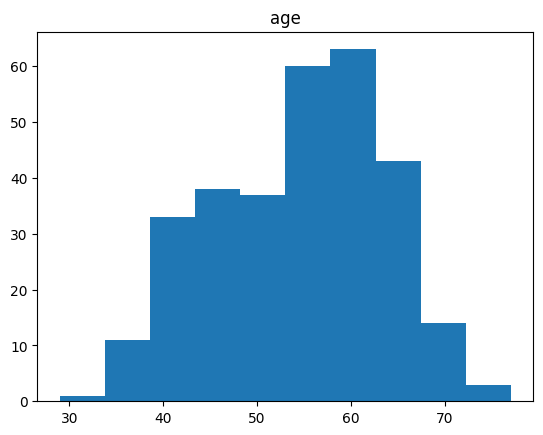

Unique values: 41
Categories chose: 7


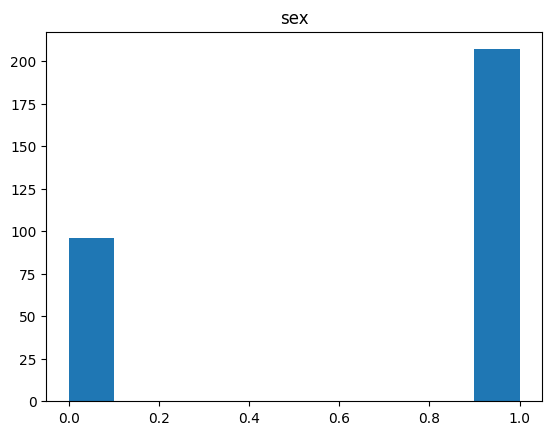

Unique values: 2
Fine for binarization.


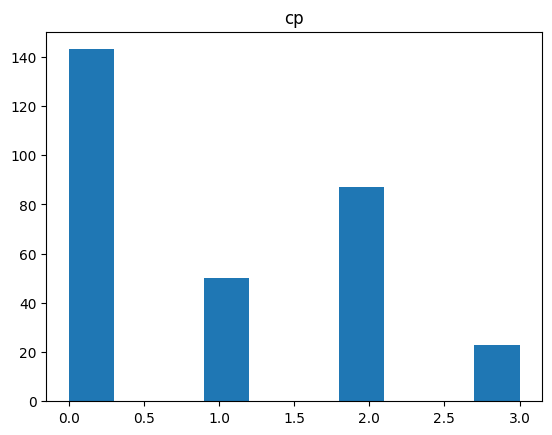

Unique values: 4
Fine for binarization.


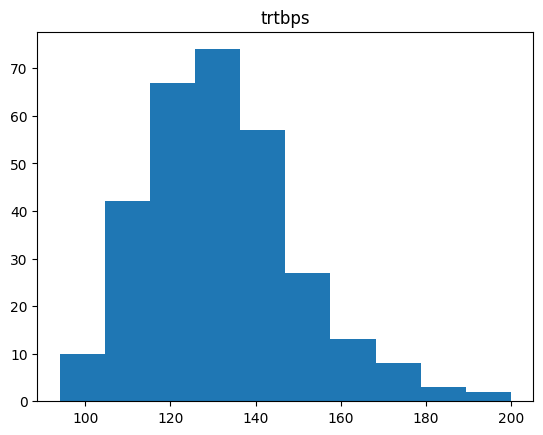

Unique values: 49
Categories chose: 6


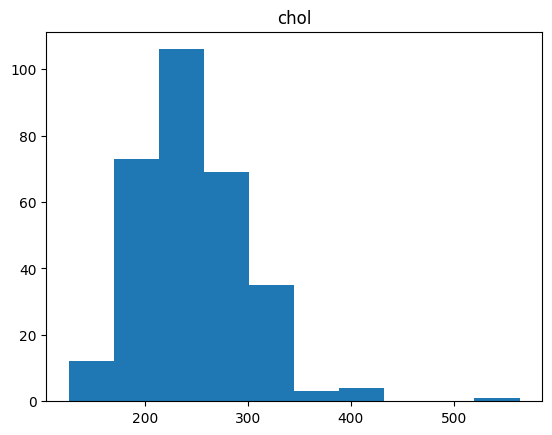

Unique values: 152
Categories chose: 5


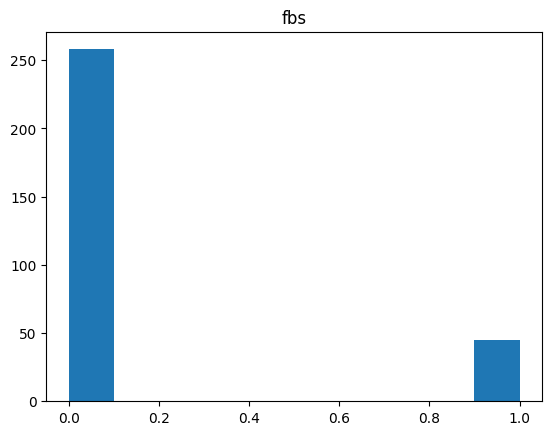

Unique values: 2
Fine for binarization.


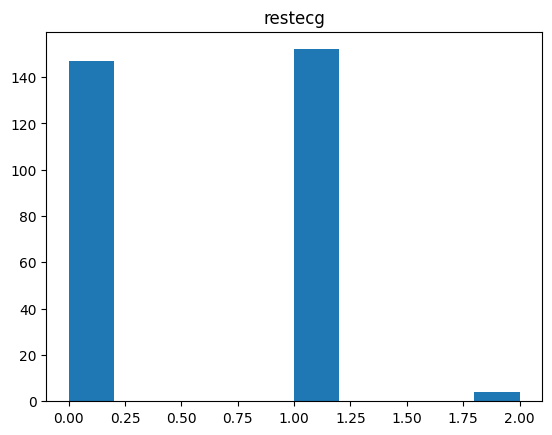

Unique values: 3
Fine for binarization.


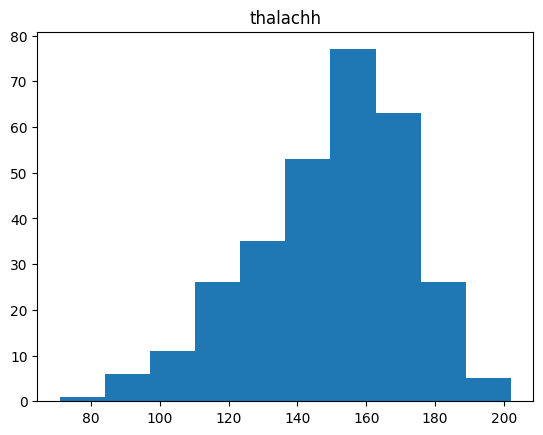

Unique values: 91
Categories chose: 6


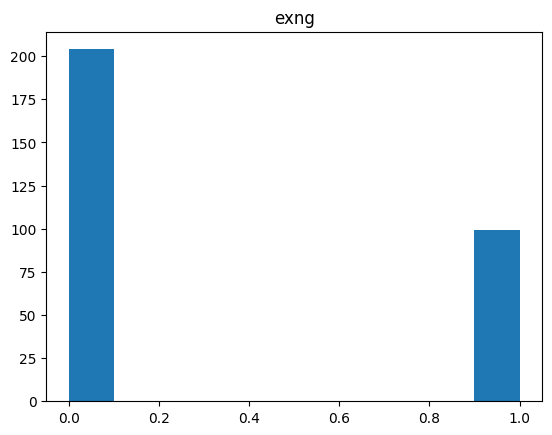

Unique values: 2
Fine for binarization.


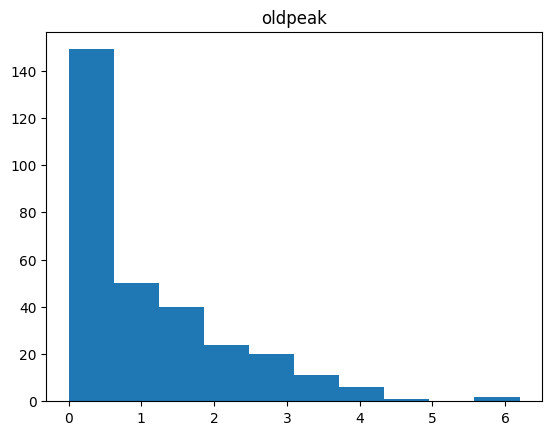

Unique values: 40
Categories chose: 3


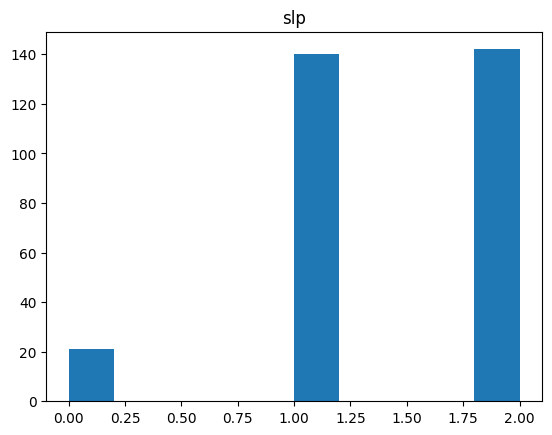

Unique values: 3
Fine for binarization.


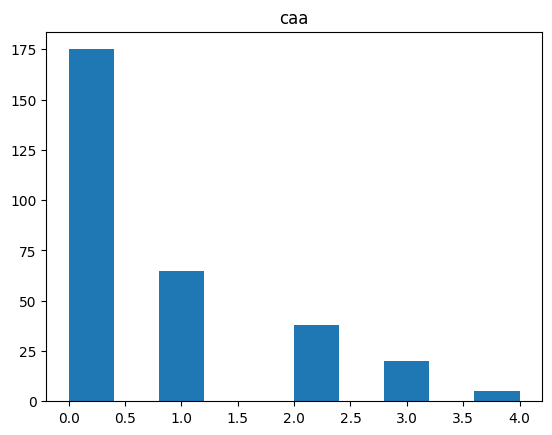

Unique values: 5
Fine for binarization.


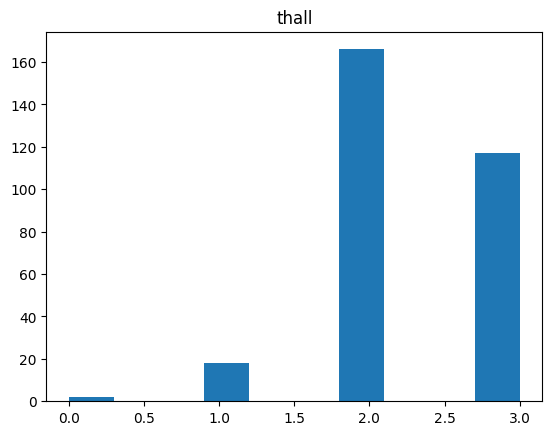

Unique values: 4
Fine for binarization.


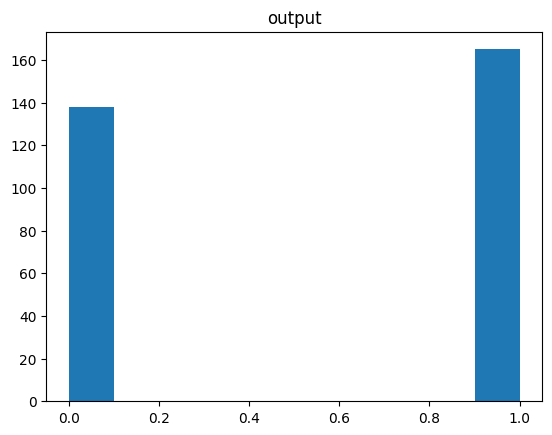

Unique values: 2
Fine for binarization.


In [110]:
not_bin_cols = []
for col in df_h.columns:
    plt.hist(df_h[col])
    plt.title(col)
    plt.show()
    print('Unique values:', len(np.unique(df_h[col])))
    if len(np.unique(df_h[col])) > 2:
        not_bin_cols.append(col)
    k = int(input())
    if k:
        df_b[col] = pd.qcut(df_h[col], q=k, precision=3)
        print('Categories chose:', k)
    else:
        df_b[col] = df_h[col]
        print('Fine for binarization.')

In [111]:
df_b

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,"(60.0, 64.0]",1,3,"(138.0, 149.333]","(230.0, 254.0]",1,0,"(143.0, 153.0]",0,"(1.4, 6.2]",0,0,1,1
1,"(28.999, 43.0]",1,2,"(122.667, 130.0]","(230.0, 254.0]",0,1,"(172.0, 202.0]",0,"(1.4, 6.2]",0,0,2,1
2,"(28.999, 43.0]",0,1,"(122.667, 130.0]","(125.999, 204.0]",0,0,"(162.0, 172.0]",0,"(0.1, 1.4]",2,0,2,1
3,"(54.0, 57.0]",1,1,"(115.0, 122.667]","(230.0, 254.0]",0,1,"(172.0, 202.0]",0,"(0.1, 1.4]",2,0,2,1
4,"(54.0, 57.0]",0,0,"(115.0, 122.667]","(285.2, 564.0]",0,1,"(162.0, 172.0]",1,"(0.1, 1.4]",2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"(54.0, 57.0]",0,0,"(138.0, 149.333]","(230.0, 254.0]",0,1,"(70.999, 125.0]",1,"(0.1, 1.4]",1,0,3,0
299,"(43.0, 49.0]",1,3,"(93.999, 115.0]","(254.0, 285.2]",0,1,"(125.0, 143.0]",0,"(0.1, 1.4]",1,0,3,0
300,"(64.0, 77.0]",1,0,"(138.0, 149.333]","(125.999, 204.0]",1,1,"(125.0, 143.0]",0,"(1.4, 6.2]",1,2,3,0
301,"(54.0, 57.0]",1,0,"(122.667, 130.0]","(125.999, 204.0]",0,1,"(70.999, 125.0]",1,"(0.1, 1.4]",1,1,3,0


In [116]:
df_bin = pd.get_dummies(df_b, columns=not_bin_cols).astype('bool')
df_bin.drop_duplicates(inplace=True)

In [117]:
df_bin

,sex,fbs,exng,output,"age_(28.999, 43.0]","age_(43.0, 49.0]","age_(49.0, 54.0]","age_(54.0, 57.0]","age_(57.0, 60.0]","age_(60.0, 64.0]",...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,True,True,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
1,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,False,False,False,True,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
3,True,False,False,True,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False
4,False,False,True,True,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,True,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
299,True,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
300,True,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
301,True,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [118]:
df_bin.shape

(301, 50)

In [119]:
df_bin['output'].value_counts(normalize=True)

output
True     0.541528
False    0.458472
Name: proportion, dtype: float64

In [123]:
df_positive = df_bin[df_bin['output'] == True].sample(n=100, random_state=3407)
df_negative = df_bin[df_bin['output'] == False].sample(n=100, random_state=3407)
df = pd.concat([df_positive, df_negative], axis=0)
df = df.sample(frac=1, random_state=3407)
df

,sex,fbs,exng,output,"age_(28.999, 43.0]","age_(43.0, 49.0]","age_(49.0, 54.0]","age_(54.0, 57.0]","age_(57.0, 60.0]","age_(60.0, 64.0]",...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
216,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
253,True,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
283,True,False,False,False,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
222,True,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
229,True,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,True,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
254,True,False,False,False,False,False,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False
221,True,False,True,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
191,True,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [124]:
df.shape

(200, 50)

In [125]:
df['output'].value_counts(normalize=True)

output
False    0.5
True     0.5
Name: proportion, dtype: float64

In [127]:
features = df.drop(columns='output').columns
target = ['output']

In [128]:
X = df[features]
y = df[target]

# Testing models

In [129]:
scoring = {'accuracy' : make_scorer(accuracy_score),
           'f1_macro' : make_scorer(f1_score, average='macro'),
           'f1_binary' : make_scorer(f1_score),
          }

kfold = StratifiedKFold(n_splits=10, random_state=3407, shuffle=True)

In [130]:
def print_results(results):
    acc = np.round(np.mean(results['test_accuracy']), 4) 
    f1_m = np.round(np.mean(results['test_f1_macro']), 4)
    f1_b = np.round(np.mean(results['test_f1_binary']), 4)
    print(f'Accuracy = {acc:0.4f}, F1_macro = {f1_m:0.4f}, F1_binary = {f1_b:0.4f}')  

In [135]:
import warnings
warnings.filterwarnings('ignore')

# Standard models

### Logistic regression

In [194]:
parameters = {'C' : np.linspace(1,5,101)}

model = LogisticRegression()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 101 candidates, totalling 1010 fits


{'C': 1.0}

In [195]:
model = LogisticRegression(C=best.best_params_['C'])
results = cross_validate(estimator=model,
                         X=X, y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.7900, F1_macro = 0.7885, F1_binary = 0.7886


### K-Nearest Neighbours

In [137]:
parameters = {'n_neighbors' : range(3, 60, 2)}

model = KNeighborsClassifier()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )

best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 29 candidates, totalling 290 fits


{'n_neighbors': 49}

In [138]:
model = KNeighborsClassifier(n_neighbors=best.best_params_['n_neighbors'])
results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.8400, F1_macro = 0.8388, F1_binary = 0.8418


### Naive Bayes

In [139]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

model = GaussianNB()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 1.0}

In [140]:
model = GaussianNB(var_smoothing=best.best_params_['var_smoothing'])

results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.8250, F1_macro = 0.8240, F1_binary = 0.8263


### Decision tree

In [141]:
parameters = {'min_samples_split' : range(2,21,2),
              'max_depth' : range(8,21,2),
              'criterion' : ['gini', 'entropy']
             }

model = DecisionTreeClassifier()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 14}

In [143]:
model = DecisionTreeClassifier(
    max_depth=best.best_params_['max_depth'], 
    min_samples_split=best.best_params_['min_samples_split'],
    criterion=best.best_params_['criterion']
)
results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.8300, F1_macro = 0.8264, F1_binary = 0.8340


### RandomForest

In [142]:
parameters = {'n_estimators' : range(40,101,10),
              'min_samples_split' : range(2,13,2),
              'max_depth' : range(4,15,2),
              'criterion' : ['gini', 'entropy']
             }
model = RandomForestClassifier()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=3, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 504 candidates, totalling 5040 fits
[CV 1/10] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=40; accuracy: (test=0.800) f1_binary: (test=0.818) f1_macro: (test=0.798) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=40; accuracy: (test=0.750) f1_binary: (test=0.762) f1_macro: (test=0.749) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=40; accuracy: (test=0.900) f1_binary: (test=0.909) f1_macro: (test=0.899) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=40; accuracy: (test=0.750) f1_binary: (test=0.706) f1_macro: (test=0.744) total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=40; accuracy: (test=0.850) f1_binary: (test=0.842) f1_macro: (test=0.850) total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, min_samples_split=2, n_estimators=40; accu

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 12,
 'n_estimators': 40}

In [29]:
model = RandomForestClassifier(
    n_estimators=best.best_params_['n_estimators'],
    min_samples_split=best.best_params_['min_samples_split'],
    max_depth=best.best_params_['max_depth'],
    criterion=best.best_params_['criterion']
)
results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.9540, F1_macro = 0.9349, F1_binary = 0.8997


# Lazy FCA

In [144]:
def compare_with_binary_f1(y_true, y_pred):
    y_tmp = np.concatenate(
        (np.array(y_true)[:,None],np.array(y_pred)[:,None]),
        axis=1
    )
    df_tmp = pd.DataFrame(y_tmp, columns=['y_true','y_pred'])
    df_tmp.y_true = df_tmp.y_true.astype(bool)
    df_tmp['y_new']= ~df_tmp.loc[df_tmp.y_pred==-1]['y_true']
    df_tmp.loc[df_tmp.y_pred!=-1, 'y_new'] = df_tmp.loc[df_tmp.y_pred!=-1,'y_pred'].astype(bool) 
    df_tmp.y_new = df_tmp.y_new.astype(bool)
    return(f1_score(df_tmp.y_true, df_tmp.y_new))

In [145]:
def results_fca(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    f1_binary = compare_with_binary_f1(y_true, y_pred)
    return (accuracy, f1, f1_binary)  

## BinarizedBinaryClassifier

**BinarizedBinaryClassifier** is not a **scikit** model, so **GridSearchCV** and **cross_validate** from **scikit** do not support it. Thus, we check desired parameters in **for**  loops.

In [188]:
parameters = {'alpha' : np.linspace(0, 1, 21),
              'method': ['standard','standard-support','ratio-support'],
             }

n = kfold.get_n_splits(X)

f1_best = 0
alpha_best = 0.
method_best = 'standard'

for method in parameters['method']:
    for alpha in parameters['alpha']:
        
        f1 = [0 for _ in range(n)]
        for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
            bin_cls = fcalc.classifier.BinarizedBinaryClassifier(
                X.iloc[train_index].values, 
                y.iloc[train_index][y.columns[0]].values,
                method=method,
                alpha=alpha
            )
            bin_cls.predict(X.iloc[test_index].values)
            f1[i] = f1_score(y.iloc[test_index], bin_cls.predictions, average='macro')
            print(f"[CV {i+1}/{n}] method={method}, alpha={alpha:0.2f}, f1_macro={f1[i]:0.4f}") 
                    
        f1_mean = np.mean(f1)
        print(f'f1_mean = {f1_mean:0.4f}\n')
        if(f1_mean > f1_best):
            f1_best = f1_mean
            alpha_best = alpha
            method_best = method
            
print(f"f1_best={f1_best:0.4f}, method={method_best}, alpha={alpha_best:0.2f}")

[CV 1/10] method=standard, alpha=0.00, f1_macro=0.4020
[CV 2/10] method=standard, alpha=0.00, f1_macro=0.3789
[CV 3/10] method=standard, alpha=0.00, f1_macro=0.5245
[CV 4/10] method=standard, alpha=0.00, f1_macro=0.4828
[CV 5/10] method=standard, alpha=0.00, f1_macro=0.3627
[CV 6/10] method=standard, alpha=0.00, f1_macro=0.4259
[CV 7/10] method=standard, alpha=0.00, f1_macro=0.2500
[CV 8/10] method=standard, alpha=0.00, f1_macro=0.4405
[CV 9/10] method=standard, alpha=0.00, f1_macro=0.5098
[CV 10/10] method=standard, alpha=0.00, f1_macro=0.4575
f1_mean = 0.4235

[CV 1/10] method=standard, alpha=0.05, f1_macro=0.4020
[CV 2/10] method=standard, alpha=0.05, f1_macro=0.3789
[CV 3/10] method=standard, alpha=0.05, f1_macro=0.5245
[CV 4/10] method=standard, alpha=0.05, f1_macro=0.4828
[CV 5/10] method=standard, alpha=0.05, f1_macro=0.3627
[CV 6/10] method=standard, alpha=0.05, f1_macro=0.4259
[CV 7/10] method=standard, alpha=0.05, f1_macro=0.2500
[CV 8/10] method=standard, alpha=0.05, f1_macr

In [190]:
f1 = [0 for i in range(n)]
accuracy = [0 for i in range(n)]
f1_binary = [0 for i in range(n)]

for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    bin_cls = fcalc.classifier.BinarizedBinaryClassifier(
        X.iloc[train_index].values, 
        y.iloc[train_index][y.columns[0]].values,
        method=method_best,
        alpha=alpha_best
    )
    bin_cls.predict(X.iloc[test_index].values)
    
    accuracy[i], f1[i], f1_binary[i] = results_fca(y.iloc[test_index][y.columns[0]].values, bin_cls.predictions)
    
    print(f"[CV {i+1}/{n}] method={method_best}, alpha={alpha_best:0.2f}", 
          f"accuracy={accuracy[i]:0.4f}, f1_macro={f1[i]:0.4f}, f1_binary={f1_binary[i]:0.4f}")

f1_mean = np.mean(f1)
accuracy_mean = np.mean(accuracy)
f1_binary_mean = np.mean(f1_binary)

print(f"\n accuracy={accuracy_mean:0.4f}, f1_macro={f1_mean:0.4f}, f1_binary={f1_binary_mean:0.4f}")

[CV 1/10] method=standard, alpha=0.00 accuracy=0.5000, f1_macro=0.4020, f1_binary=0.4444
[CV 2/10] method=standard, alpha=0.00 accuracy=0.5000, f1_macro=0.3789, f1_binary=0.5833
[CV 3/10] method=standard, alpha=0.00 accuracy=0.6500, f1_macro=0.5245, f1_binary=0.6667
[CV 4/10] method=standard, alpha=0.00 accuracy=0.6000, f1_macro=0.4828, f1_binary=0.6364
[CV 5/10] method=standard, alpha=0.00 accuracy=0.4500, f1_macro=0.3627, f1_binary=0.4211
[CV 6/10] method=standard, alpha=0.00 accuracy=0.5500, f1_macro=0.4259, f1_binary=0.6087
[CV 7/10] method=standard, alpha=0.00 accuracy=0.3000, f1_macro=0.2500, f1_binary=0.2222
[CV 8/10] method=standard, alpha=0.00 accuracy=0.5000, f1_macro=0.4405, f1_binary=0.4444
[CV 9/10] method=standard, alpha=0.00 accuracy=0.6500, f1_macro=0.5098, f1_binary=0.6667
[CV 10/10] method=standard, alpha=0.00 accuracy=0.5500, f1_macro=0.4575, f1_binary=0.5263

 accuracy=0.5250, f1_macro=0.4235, f1_binary=0.5220


## PatternBinaryClassifier

In [191]:
parameters = {'alpha' : np.linspace(0, 0.4, 11),
              'method': ['standard','standard-support','ratio-support'],
             }

n = kfold.get_n_splits(X)

f1_best_p = 0
alpha_best_p = 0.
method_best_p = 'standard'

for method in parameters['method']:
    for alpha in parameters['alpha']:
        
        f1 = [0 for i in range(n)]
        for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
            bin_cls = fcalc.classifier.PatternBinaryClassifier(
                X.iloc[train_index].values, 
                y.iloc[train_index][y.columns[0]].values,
                method=method,
                alpha=alpha
            )
            bin_cls.predict(X.iloc[test_index].values)
            f1[i] = f1_score(y.iloc[test_index][y.columns[0]].values, bin_cls.predictions, average='macro')
            print(f"[CV {i+1}/{n}] method={method}, alpha={alpha:0.2f}, f1_macro={f1[i]:0.4f}") 
                    
        f1_mean = np.mean(f1)
        print(f'f1_mean = {f1_mean:0.4f}\n')
        if(f1_mean > f1_best_p):
            f1_best_p = f1_mean
            alpha_best_p = alpha
            method_best_p = method
            
print(f"f1_best={f1_best_p:0.4f}, method={method_best_p}, alpha={alpha_best_p:0.2f}")

[CV 1/10] method=standard, alpha=0.00, f1_macro=0.3236
[CV 2/10] method=standard, alpha=0.00, f1_macro=0.4777
[CV 3/10] method=standard, alpha=0.00, f1_macro=0.4541
[CV 4/10] method=standard, alpha=0.00, f1_macro=0.4183
[CV 5/10] method=standard, alpha=0.00, f1_macro=0.4123
[CV 6/10] method=standard, alpha=0.00, f1_macro=0.4183
[CV 7/10] method=standard, alpha=0.00, f1_macro=0.4762
[CV 8/10] method=standard, alpha=0.00, f1_macro=0.4778
[CV 9/10] method=standard, alpha=0.00, f1_macro=0.5926
[CV 10/10] method=standard, alpha=0.00, f1_macro=0.9000
f1_mean = 0.4951

[CV 1/10] method=standard, alpha=0.04, f1_macro=0.0000
[CV 2/10] method=standard, alpha=0.04, f1_macro=0.0000
[CV 3/10] method=standard, alpha=0.04, f1_macro=0.0000
[CV 4/10] method=standard, alpha=0.04, f1_macro=0.0000
[CV 5/10] method=standard, alpha=0.04, f1_macro=0.0000
[CV 6/10] method=standard, alpha=0.04, f1_macro=0.0000
[CV 7/10] method=standard, alpha=0.04, f1_macro=0.0000
[CV 8/10] method=standard, alpha=0.04, f1_macr

In [192]:
f1 = [0 for i in range(n)]
accuracy = [0 for i in range(n)]
f1_binary = [0 for i in range(n)]

for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    bin_cls = fcalc.classifier.PatternBinaryClassifier(
        X.iloc[train_index].values, 
        y.iloc[train_index][y.columns[0]].values,
        method=method_best_p,
        alpha=alpha_best_p
    )
    bin_cls.predict(X.iloc[test_index].values)
    
    accuracy[i], f1[i], f1_binary[i] = results_fca(y.iloc[test_index][y.columns[0]].values, bin_cls.predictions)
    
    print(f"[CV {i+1}/{n}] method={method_best_p}, alpha={alpha_best_p:0.2f}", 
          f"accuracy={accuracy[i]:0.4f}, f1_macro={f1[i]:0.4f}, f1_binary={f1_binary[i]:0.4f}")

f1_mean = np.mean(f1)
accuracy_mean = np.mean(accuracy)
f1_binary_mean = np.mean(f1_binary)

print(f"\n accuracy={accuracy_mean:0.4f}, f1_macro={f1_mean:0.4f}, f1_binary={f1_binary_mean:0.4f}")

[CV 1/10] method=ratio-support, alpha=0.00 accuracy=0.5500, f1_macro=0.5489, f1_binary=0.5714
[CV 2/10] method=ratio-support, alpha=0.00 accuracy=0.7000, f1_macro=0.6970, f1_binary=0.6667
[CV 3/10] method=ratio-support, alpha=0.00 accuracy=0.7000, f1_macro=0.6875, f1_binary=0.7500
[CV 4/10] method=ratio-support, alpha=0.00 accuracy=0.7000, f1_macro=0.6970, f1_binary=0.7273
[CV 5/10] method=ratio-support, alpha=0.00 accuracy=0.6500, f1_macro=0.4439, f1_binary=0.6667
[CV 6/10] method=ratio-support, alpha=0.00 accuracy=0.6500, f1_macro=0.6419, f1_binary=0.6957
[CV 7/10] method=ratio-support, alpha=0.00 accuracy=0.7500, f1_macro=0.7494, f1_binary=0.7368
[CV 8/10] method=ratio-support, alpha=0.00 accuracy=0.8500, f1_macro=0.8496, f1_binary=0.8571
[CV 9/10] method=ratio-support, alpha=0.00 accuracy=0.9500, f1_macro=0.9499, f1_binary=0.9524
[CV 10/10] method=ratio-support, alpha=0.00 accuracy=0.9000, f1_macro=0.9000, f1_binary=0.9000

 accuracy=0.7400, f1_macro=0.7165, f1_binary=0.7524
